In [1]:
import os
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd() + "\\linear_data.txt"
data = pd.read_csv(path, header = None, names = ["Input", "Output"])
# data.head()

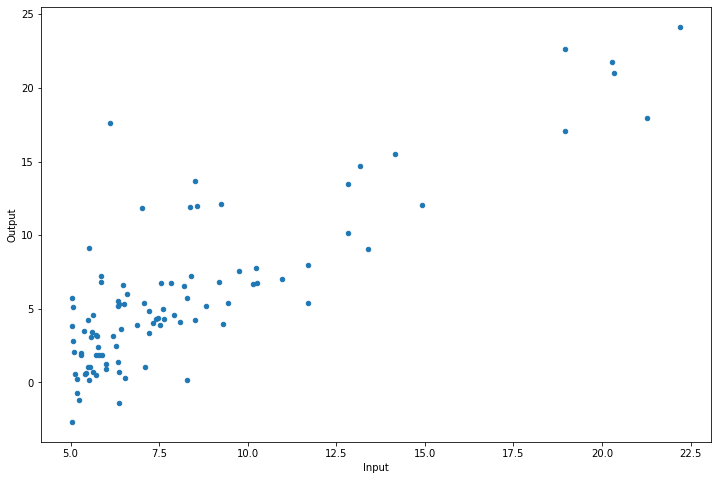

In [3]:
data.plot(kind='scatter', x='Input', y='Output', figsize=(12,8))

In [4]:
def computeCost(X, y, theta):
    inner = nd.power(((X * theta.T) - y), 2)
    return nd.sum(inner) / (2*len(X))

In [5]:
data.insert(0, "Ones", 1)
# data.head()

,Ones,Input,Output
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [7]:
X = nd.matrix(X.values)
Y = nd.matrix(y.values)
theta = nd.matrix(nd.array([0, 0]))
# print(X, y, theta)
# print(X.shape, y.shape, theta.shape)

(97, 2) (97, 1) (1, 2)


In [8]:
computeCost(X, y, theta)

Output    32.072734
dtype: float64

In [9]:
def gradientDescent(X, y, theta, alpha, iter_count):
    temp = nd.matrix(nd.zeros(theta.shape))
    cost = nd.zeros(iter_count)
    parameters = int(theta.ravel().shape[1])
    for i in range(iter_count):
        error = X*theta.T - y
        for j in range(parameters):
            term = nd.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha/len(X)) * nd.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [10]:
iter_count = 10000
alpha = 0.01
g, cost = gradientDescent(X, y, theta, alpha, iter_count)
print(g)

[[-3.89578082  1.19303364]]


In [11]:
computeCost(X, y, g)

Output    4.476971
dtype: float64

Text(0.5, 1.0, 'Linear Regression Prediction')

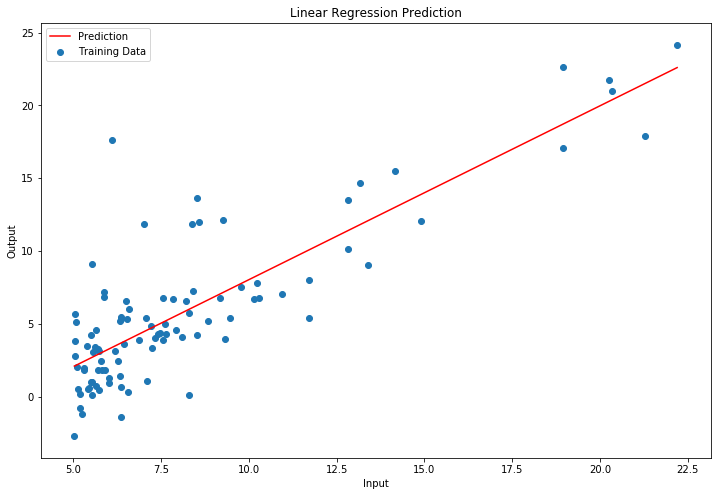

In [12]:
x = nd.linspace(data.Input.min(), data.Input.max(),100)
h = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, h, 'r', label='Prediction')
ax.scatter(data.Input, data.Output, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel("Input")
ax.set_ylabel("Output")
ax.set_title("Linear Regression Prediction")

Text(0.5, 1.0, 'Cost Function Descent')

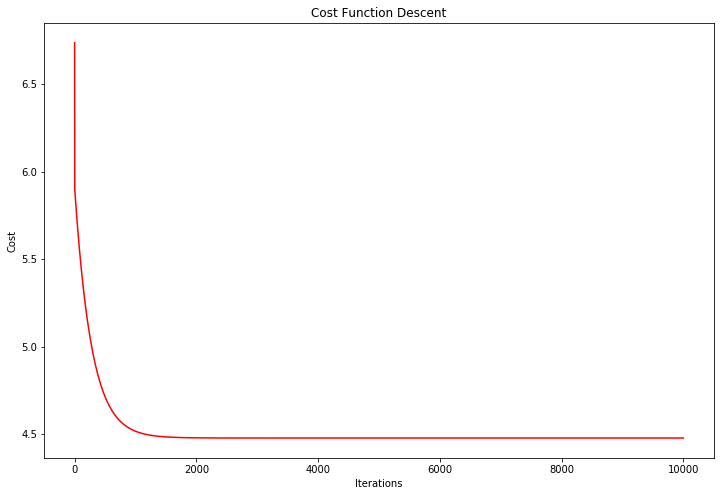

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nd.arange(iter_count), cost, "r")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Cost Function Descent")